In [1]:
from pylab import np
import matplotlib.pyplot as plt

In [2]:
N = 50000 # number of steps
dt = 0.001 # time interval [s]
tf = dt*float(N) # time step [s]

k = 50.0 # spring constant M/m
m = 2.0 # mass [kg]
yo = 0.2 # initial position [m]
vo = 0.0 # inital velocity [m/s]

In [3]:
def euler(y, t, dt, derivs): # Euler method y_i -> y_i+1
    y_next = y + derivs(y,t) * dt
    return y_next

def rk2(y, t, dt, derivs): # rk2 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1, t + dt)
    y_next = y + (k1 + k2) / 2.
    return y_next

def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
        k1 = dt * derivs(y, t)
        k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
        k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
        k4 = dt * derivs(y + k3, t + dt)
        y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
        return y_next

def massspring( y, time): # calc differentials
    diff0 = y[1] # dx/dt = v
    diff1 = - (k/m)*y[0] # dv/dt = −g
    return np.array([diff0, diff1])

Text(0, 0.5, 'position [m]')

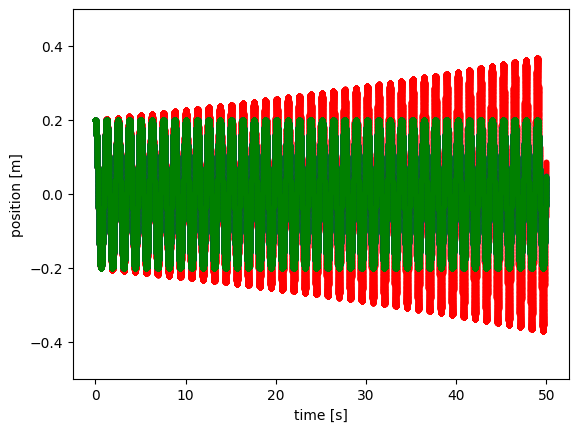

In [4]:
t = np.linspace(0, tf, N) # Nx1 evenly spaced t_i time array
y = np.zeros([N,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state

y[0,0] = yo
y[0,1] = vo

ya = yo*np.cos(np.sqrt(k/m)*t)

for j in range(N-1): # Loop over steps
    y[j+1] = euler(y[j,:], t[j], dt, massspring)
ye = y[:,0].copy()
dye = ye - ya

for j in range(N-1): # Loop over steps
    y[j+1] = rk2(y[j,:], t[j], dt, massspring)
yrk2 = y[:,0].copy()
dyrk2 = yrk2 - ya

for j in range(N-1): # Loop over steps
    y[j+1] = rk4(y[j,:], t[j], dt, massspring)
yrk4 = y[:,0].copy()
dyrk4 = yrk4 - ya

plt.plot(t, ya, "m")
plt.plot(t, ye, "r.")
plt.plot(t, yrk2, "b.")
plt.plot(t, yrk4, "g.")
plt.ylim(-0.5, 0.5)
plt.xlabel ('time [s]')
plt.ylabel ('position [m]')